# Data Modelling

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Load Preprocessing Data

In [2]:
df_campaign_model = pd.read_csv('data/marketing_campaign_modelling.csv')
df_campaign_model.head()

,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,Age,Children,TotalSpending,NumOfTransactions,NumOfAcceptedCmp,CVR,AgeGroup,IncomeGroup,SpendingGroup,TransactionGroup,MaritalStatus_Bertunangan,MaritalStatus_Cerai,MaritalStatus_Duda,MaritalStatus_Janda,MaritalStatus_Lajang,MaritalStatus_Menikah
0,2,0.288624,0.311959,0.686577,0,1,1.022565,0,1.684059,1.332699,0,0.142857,4,5,3,2,0,0,0,0,1,0
1,2,-0.264992,-0.378363,-0.134431,0,0,1.280313,2,-0.961651,-1.162050,0,0.000000,4,4,0,0,0,0,0,0,1,0
2,2,0.921147,-0.792557,-0.544934,0,0,0.335236,0,0.284661,0.807488,0,0.000000,3,7,1,2,1,0,0,0,0,0
3,2,-1.189626,-0.792557,0.276073,0,0,-1.297169,1,-0.918388,-0.899445,0,0.000000,1,2,0,0,1,0,0,0,0,0
4,4,0.295900,1.554540,-0.134431,0,0,-1.039421,1,-0.304384,0.544883,0,0.000000,2,5,0,1,0,0,0,0,0,1


In [3]:
df_campaign_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  2049 non-null   int64  
 1   Income                     2049 non-null   float64
 2   Recency                    2049 non-null   float64
 3   NumWebVisitsMonth          2049 non-null   float64
 4   Complain                   2049 non-null   int64  
 5   Response                   2049 non-null   int64  
 6   Age                        2049 non-null   float64
 7   Children                   2049 non-null   int64  
 8   TotalSpending              2049 non-null   float64
 9   NumOfTransactions          2049 non-null   float64
 10  NumOfAcceptedCmp           2049 non-null   int64  
 11  CVR                        2049 non-null   float64
 12  AgeGroup                   2049 non-null   int64  
 13  IncomeGroup                2049 non-null   int64

In [4]:
# drop_cols = ['Income', 'Age', 'Children', 'TotalSpending', 'NumOfTransactions']
# df_campaign_model = df_campaign_cleaned.drop(columns=drop_cols, axis=1)

# Find Best N-Cluster

In [5]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 11)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(df_campaign_model)

    distortions.append(sum(np.min(cdist(df_campaign_model, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / len(df_campaign_model))
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(df_campaign_model, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / len(df_campaign_model)
    mapping2[k] = kmeanModel.inertia_

In [6]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

2 : 3.0809182320605406
3 : 2.875539896129985
4 : 2.7449282113835674
5 : 2.6533171966114484
6 : 2.5834029122402633
7 : 2.5325623150338115
8 : 2.4896655904558576
9 : 2.4547256628868577
10 : 2.424176035392825


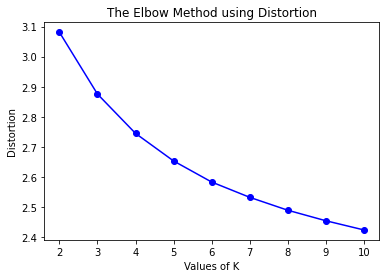

In [7]:
plt.plot(K, distortions, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [8]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

2 : 20868.93503116989
3 : 18120.535315046065
4 : 16547.71668452512
5 : 15371.056213340209
6 : 14581.830454370047
7 : 14019.852020803373
8 : 13515.599802137112
9 : 13147.09071470131
10 : 12822.97910385433


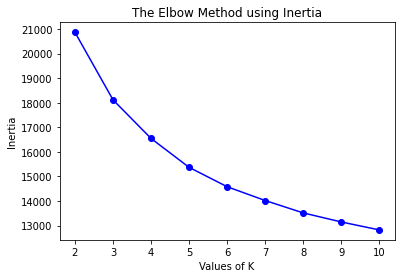

In [9]:
plt.plot(K, inertias, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

# Evaluation Score

In [10]:
eval_scores = []
for k in K:
    clusterer = KMeans(n_clusters=k, random_state=0)
    preds = clusterer.fit_predict(df_campaign_model)

    score = silhouette_score(df_campaign_model, preds)
    eval_scores.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(k, score))

For n_clusters = 2, silhouette score is 0.32700798614682536
For n_clusters = 3, silhouette score is 0.20540682936943438
For n_clusters = 4, silhouette score is 0.15789438162106723
For n_clusters = 5, silhouette score is 0.16219921928368275
For n_clusters = 6, silhouette score is 0.14984997244418566
For n_clusters = 7, silhouette score is 0.13620444974265827
For n_clusters = 8, silhouette score is 0.1264190583561438
For n_clusters = 9, silhouette score is 0.1221215839602944
For n_clusters = 10, silhouette score is 0.11950748616737013


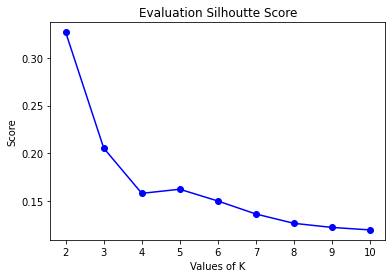

In [11]:
plt.plot(K, eval_scores, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Score')
plt.title('Evaluation Silhoutte Score')
plt.show()

# K-Means Clustering

In [12]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_campaign_model)

# add cluster label into feature
df_campaign_final = pd.read_csv('data/marketing_campaign_cleaned.csv')
df_campaign_final['Cluster'] = kmeans.labels_
df_campaign_final.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Age,Children,TotalSpending,NumOfTransactions,NumOfAcceptedCmp,CVR,AgeGroup,IncomeGroup,SpendingGroup,TransactionGroup,Cluster
0,S1,Lajang,58138000.0,58,7,0,1,65,0,1617000,25,0,0.142857,61-70,50M-60M,1.5M-2M,20-30,1
1,S1,Lajang,46344000.0,38,5,0,0,68,2,27000,6,0,0.000000,61-70,40M-50M,0-0.5M,0-10,3
2,S1,Bertunangan,71613000.0,26,4,0,0,57,0,776000,21,0,0.000000,51-60,70M-80M,0.5M-1M,20-30,1
3,S1,Bertunangan,26646000.0,26,6,0,0,38,1,53000,8,0,0.000000,31-40,20M-30M,0-0.5M,0-10,0
4,S3,Menikah,58293000.0,94,5,0,0,41,1,422000,19,0,0.000000,41-50,50M-60M,0-0.5M,10-20,1


In [13]:
df_campaign_final.groupby('Cluster')[['Age','Income', 'NumOfTransactions', 'TotalSpending', 'CVR']].agg(['min', 'mean', 'max'])

Age                     Income                             \
        min       mean max         min          mean          max   
Cluster                                                             
0        26  43.390057  72   1730000.0  2.791480e+07   59060000.0   
1        32  57.256410  79  40464000.0  6.158051e+07   79865000.0   
2        27  52.337156  79  51381500.0  7.993656e+07  162397000.0   
3        41  58.867647  78  15033000.0  4.310900e+07   64587000.0   

        NumOfTransactions                TotalSpending                         \
                      min       mean max           min          mean      max   
Cluster                                                                         
0                       0   7.806883  27          5000  9.621415e+04   839000   
1                      10  21.684982  39        222000  8.357637e+05  1895000   
2                       0  20.614679  37          6000  1.471087e+06  2525000   
3                       4  10.141544  23          8000  1.681121e+05   835000   

         CVR                  
         min      mean   max  
Cluster                       
0        0.0  0.015725  0.20  
1        0.0  0.022313  1.00  
2        0.0  0.144937  1.00  
3        0.0  0.012552  0.25

In [14]:
df_campaign_final.to_csv('data/marketing_campaign_final.csv', index=False)